# Import Dependencies

We begin by importing the necessary libraries.

In [89]:
# Data analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read data

Then, read in the `flights` dataframe from the `nycflights13` package. Note, a separate R script was used to export the dataframe into a csv file.

In [13]:
# Read data
df = pd.read_csv('../data/flights_df.csv')
# Drop irrelevant columns
df.drop(columns=['Unnamed: 0'], inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)
# Print first 5 rows
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


According to the given instructions, we create a new dataframe containing only flights departing from LaGuardia Airport (LAG).

In [57]:
# Create df with flights from LGA
lag_df = df[df['origin'] == 'LGA'].copy()
# Display first 5 rows
lag_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,707,N3DUAA,LGA,DFW,257.0,1389,6,0,2013-01-01 06:00:00


Additionally, create another dataframe with flights specifically going from LAG to ATL. 

In [58]:
# Create df with flights from LGA to ATL
lag_to_atlanta_df = lag_df[lag_df['dest'] == 'ATL'].copy()
# Display first 5 rows
lag_to_atlanta_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
18,2013,1,1,600.0,600,0.0,837.0,825,12.0,MQ,4650,N542MQ,LGA,ATL,134.0,762,6,0,2013-01-01 06:00:00
62,2013,1,1,658.0,700,-2.0,944.0,939,5.0,DL,1547,N6703D,LGA,ATL,126.0,762,7,0,2013-01-01 07:00:00
101,2013,1,1,754.0,759,-5.0,1039.0,1041,-2.0,DL,2047,N935DL,LGA,ATL,126.0,762,7,59,2013-01-01 07:00:00
123,2013,1,1,814.0,810,4.0,1047.0,1030,17.0,FL,346,N977AT,LGA,ATL,132.0,762,8,10,2013-01-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336542,2013,9,30,1752.0,1759,-7.0,2021.0,2031,-10.0,DL,61,N683DA,LGA,ATL,104.0,762,17,59,2013-09-30 17:00:00
336602,2013,9,30,1851.0,1900,-9.0,2114.0,2132,-18.0,DL,947,N979DL,LGA,ATL,97.0,762,19,0,2013-09-30 19:00:00
336621,2013,9,30,1903.0,1859,4.0,2125.0,2126,-1.0,FL,645,N939AT,LGA,ATL,101.0,762,18,59,2013-09-30 18:00:00
336665,2013,9,30,1944.0,1950,-6.0,2208.0,2215,-7.0,MQ,3662,N507MQ,LGA,ATL,100.0,762,19,50,2013-09-30 19:00:00


## Question 1

Use `lag_to_atlanta_df` and a random sample of 29 values of the `arr_delay` variable. Seed the random generator using 21323.


In [ ]:
# Sample n=29 from arr_delay
lag_to_atlanta_sample = lag_to_atlanta_df['arr_delay'].sample(n=29, random_state=21323)

### Part a: Use the naive method to compute the 70th percentile.

Begin by sorting the values in ascending order & finding the index for the 70th percentile.

In [54]:
# Step 1: sort values in ascending order
lag_to_atlanta_sample = lag_to_atlanta_sample.sort_values().reset_index(drop=True)
# Step 2: compute index for 70th percentile
i = 70 * (29 + 1) / 100
# Print index
print(i)

21.0


Since the index is odd, we can simply retrieve the value of interest. 

In [62]:
# Step 3: retrieve value at index i
lag_to_atlanta_sample[int(i)]

20.0

In other words, the 70th percentile for the given sample is 20.

### Part b: Use the quantile function to do the same thing.

Since we're working in Python, we'll use the "built-in" `numpy.percentile()` function in place of the R `quantile()` function.

In [56]:
# Compute 70th percentile of sample
np.percentile(lag_to_atlanta_sample, 70)

18.199999999999996

Interestingly, the 70th percentile according to this method is given as 18.2.

### Part c: Use the naive method to compute the median and the 1st and 3rd quartiles.

Begin by computing the median; since `n=29` is odd, we proceed with "Case 1". 

In [69]:
# Compute median
i = int((29 + 1) / 2)
# Retrieve median value in sample
lag_to_atlanta_sample[i]

7.0

The median value in the sample is 7. 

To compute the 25th and 75th percentiles, we split the sorted sample along the median value, and recursively apply the same procedure to both halves. 

In [83]:
# Split into 2 halves
left, right = lag_to_atlanta_sample[:i].reset_index(drop=True), lag_to_atlanta_sample[i + 1:].reset_index(drop=True)
# Get lengths of both halves
n_left, n_right = len(left), len(right)
# Print lengths
print(n_left, n_right)

15 13


Since both halves are of odd length, we proceed again with "Case 1". 

In [84]:
# Apply median method recursively
i_left = int((n_left + 1) / 2)
# Print Q1
left[i_left]

-8.0

The value at Q1 is -8 for this sample. 

In [85]:
# Apply median method recursively
i_right = int((n_right + 1) / 2)
# Print Q3
right[i_right]

24.0

The value at Q3 is 24.

### Part d: Use favstats() to compute the same thing.

Since we're working in Python, we'll use the "built-in" `df.describe()` function in place of the R `favstats()` function.

In [88]:
# Print descriptive statistics for the sample
lag_to_atlanta_sample.describe()

count     29.000000
mean      11.275862
std       33.573902
min      -28.000000
25%      -12.000000
50%        4.000000
75%       20.000000
max      129.000000
Name: arr_delay, dtype: float64

Interestingly, we get Q1 = -12, median = 4, and Q3 = 20. Slightly off from what we got using the naive method.

### Part e: Produce a box plot. Are there any outliers?

<AxesSubplot: >

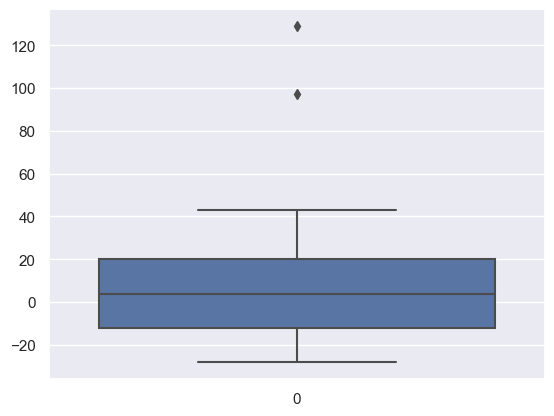

In [90]:
# Box plot
sns.boxplot(lag_to_atlanta_sample)

Yes, there are 2 outliers (around 100 and 130).